<h1><center> Australian Dataset  </center></h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, get_scorer_names

In [2]:
data_aus = pd.read_csv('australian.dat', header=None, sep=' ')
data_aus.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']

data_aus.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
data_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [4]:
data_aus[['A2','A3','A7','A10','A11','A13','A14']].describe()

,A2,A3,A7,A10,A11,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,0.457971,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,0.498592,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,0.000000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,1.000000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,1.000000,2000.000000,100001.000000


In [5]:
data_aus[['A1','A4','A5','A6','A8','A9','A11','A12','A15']].mode()

,A1,A4,A5,A6,A8,A9,A11,A12,A15
0,1,2,8,4,1,0,0,2,0


In [6]:
data_aus.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
A1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
A10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


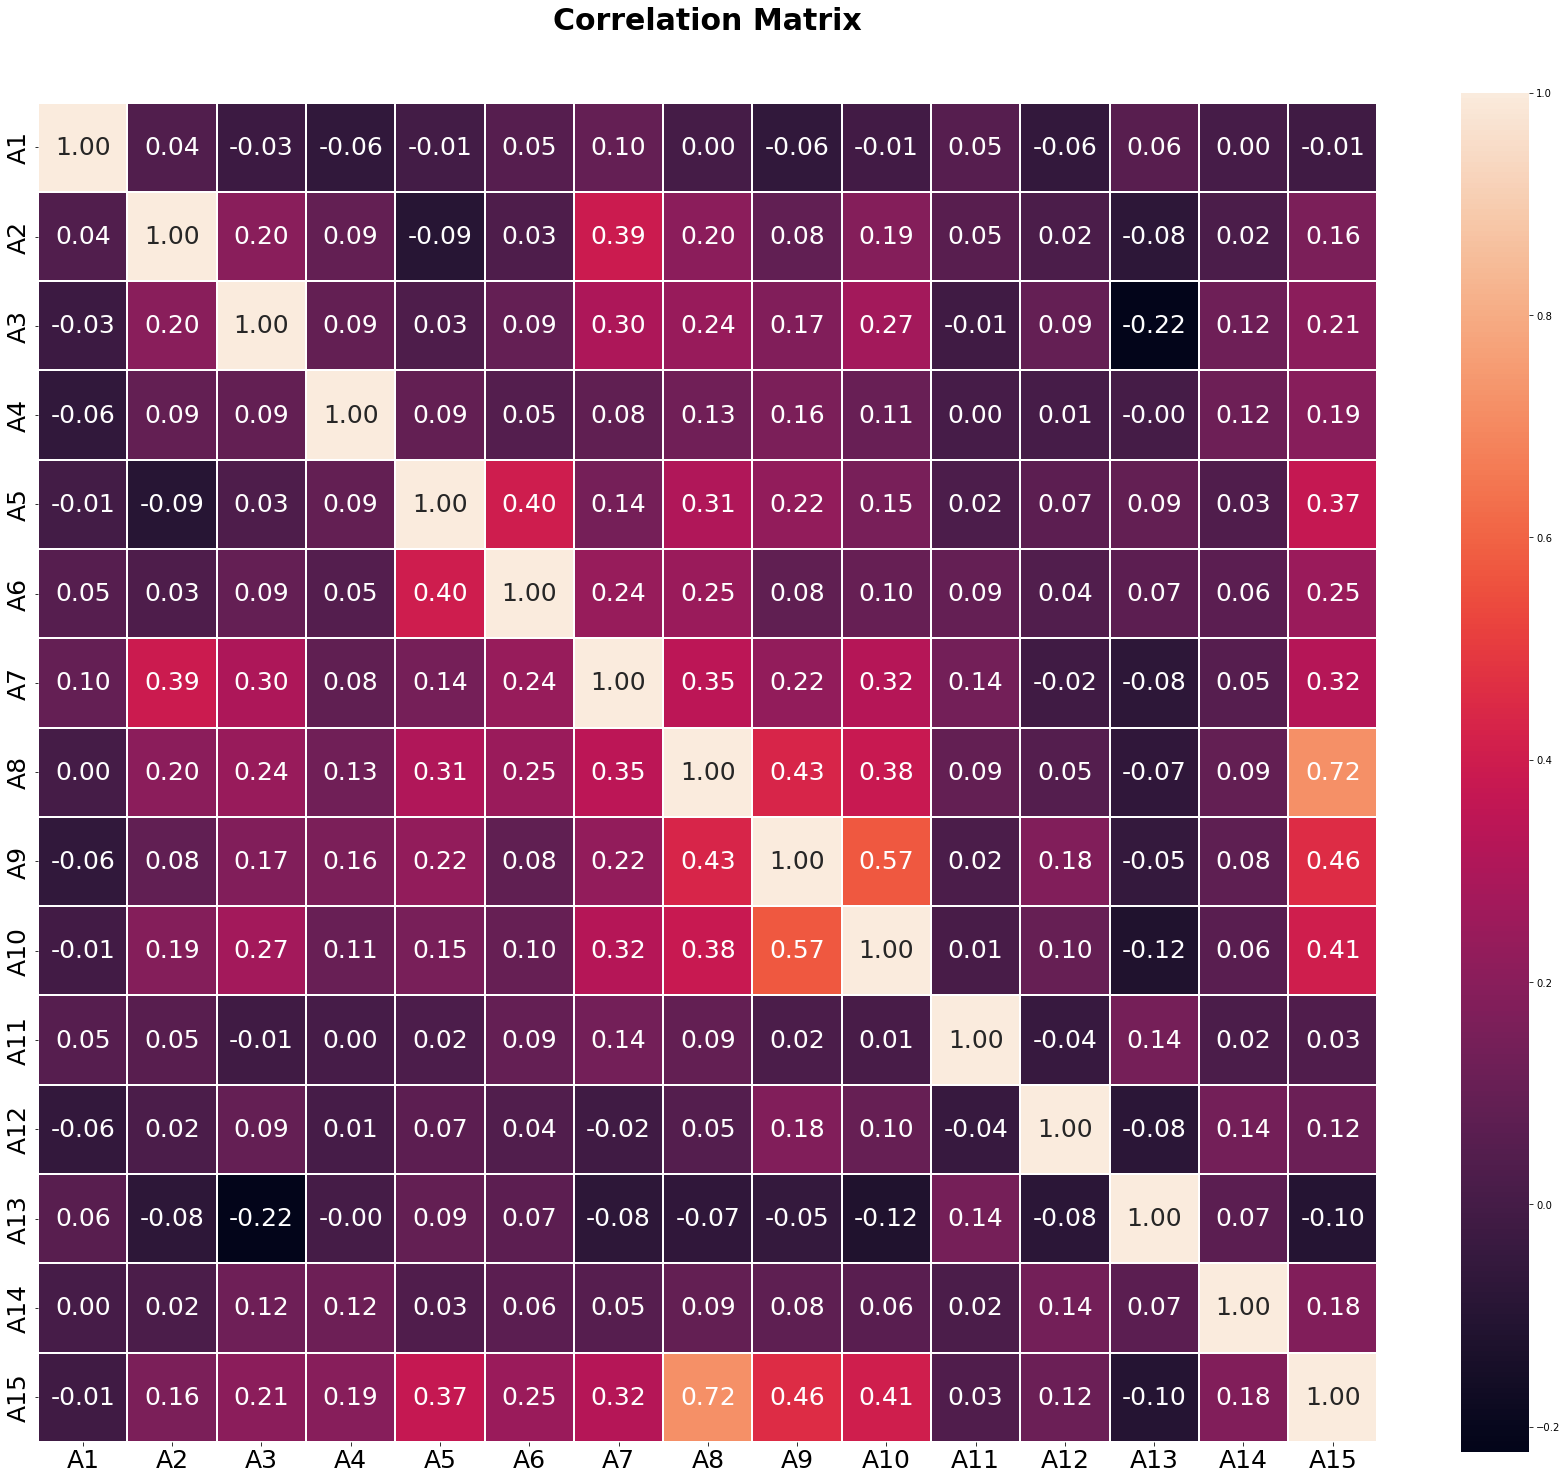

In [7]:
plt.rcParams["figure.figsize"]=(30,25)
sns.heatmap(data_aus.corr(), annot=True, fmt=".2f", annot_kws={'size': 25}, linewidths=2, square=True)
plt.title('Correlation Matrix', fontsize=30, y=1.05, weight='bold')
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

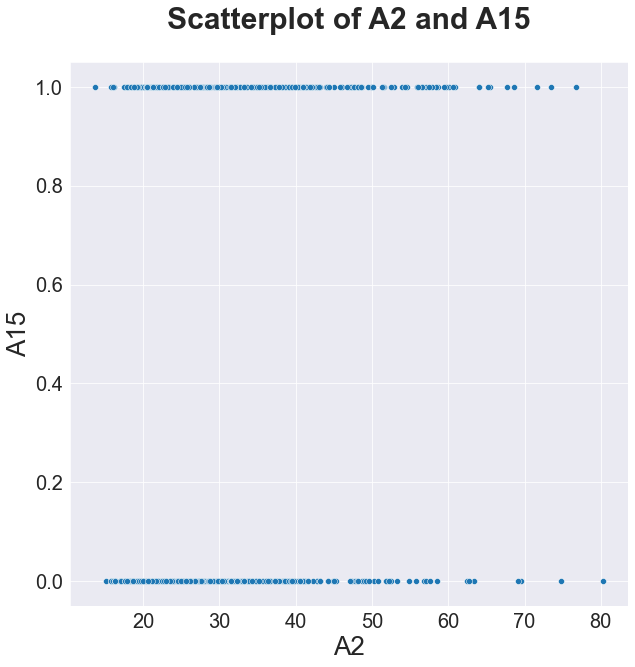

In [8]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_aus['A2'], y=data_aus['A15'])

plt.title('Scatterplot of A2 and A15', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A2', fontsize=26)
plt.ylabel('A15', fontsize=26)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

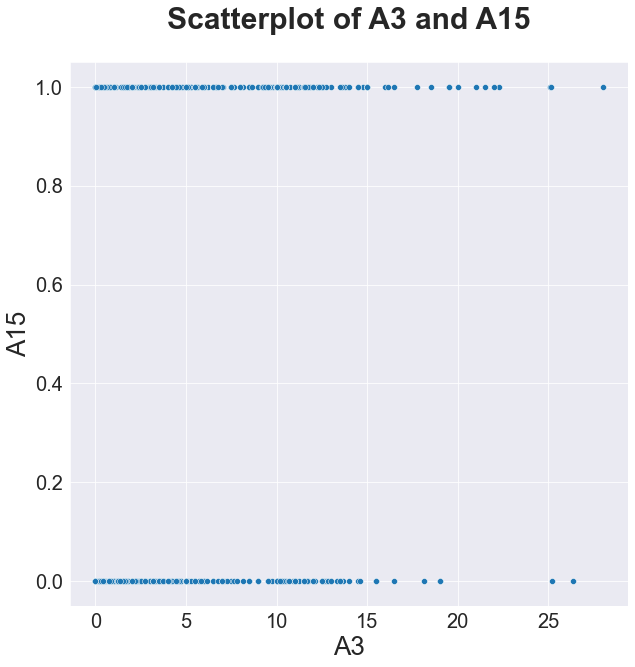

In [9]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_aus['A3'], y=data_aus['A15'])

plt.title('Scatterplot of A3 and A15', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A3', fontsize=26)
plt.ylabel('A15', fontsize=26)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

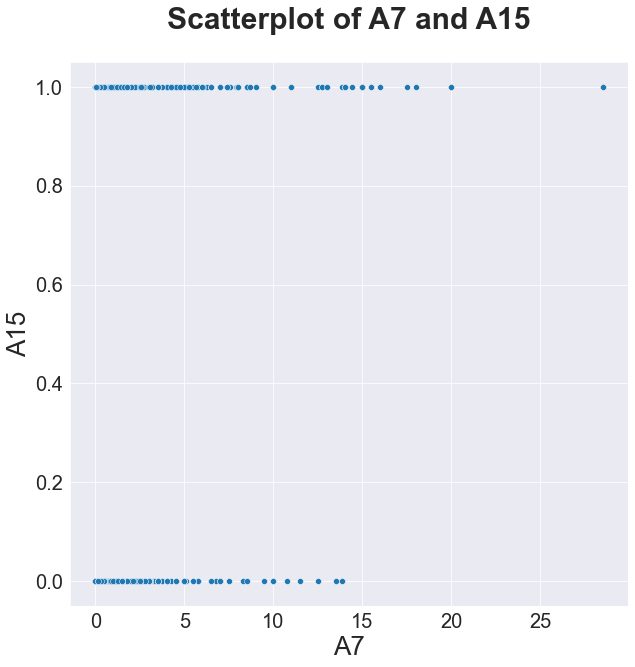

In [10]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_aus['A7'], y=data_aus['A15'])

plt.title('Scatterplot of A7 and A15', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A7', fontsize=26)
plt.ylabel('A15', fontsize=26)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

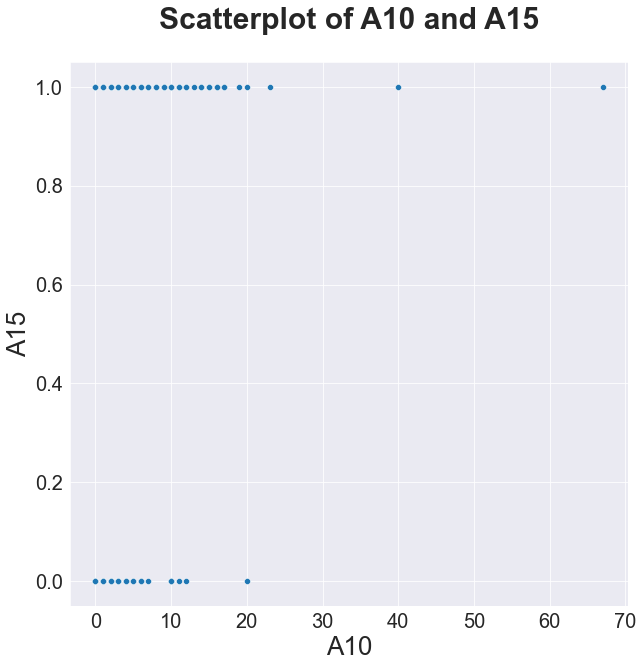

In [11]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_aus['A10'], y=data_aus['A15'])

plt.title('Scatterplot of A10 and A15', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A10', fontsize=26)
plt.ylabel('A15', fontsize=26)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

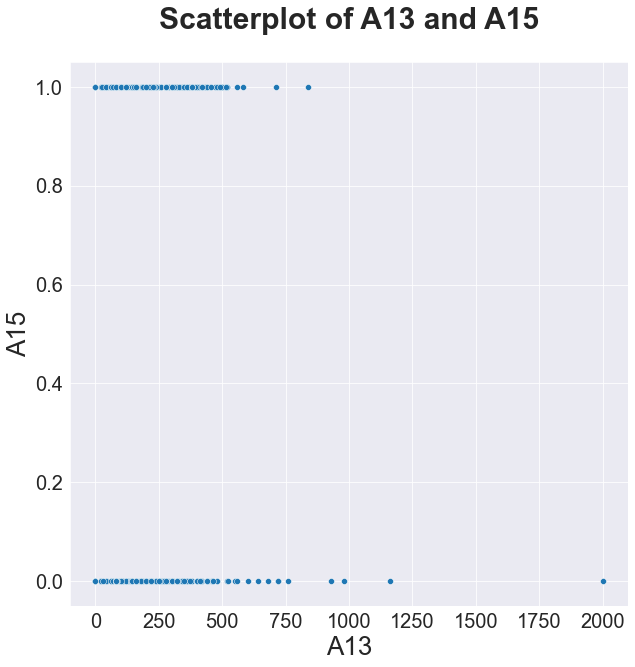

In [12]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_aus['A13'], y=data_aus['A15'])

plt.title('Scatterplot of A13 and A15', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A13', fontsize=26)
plt.ylabel('A15', fontsize=26)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

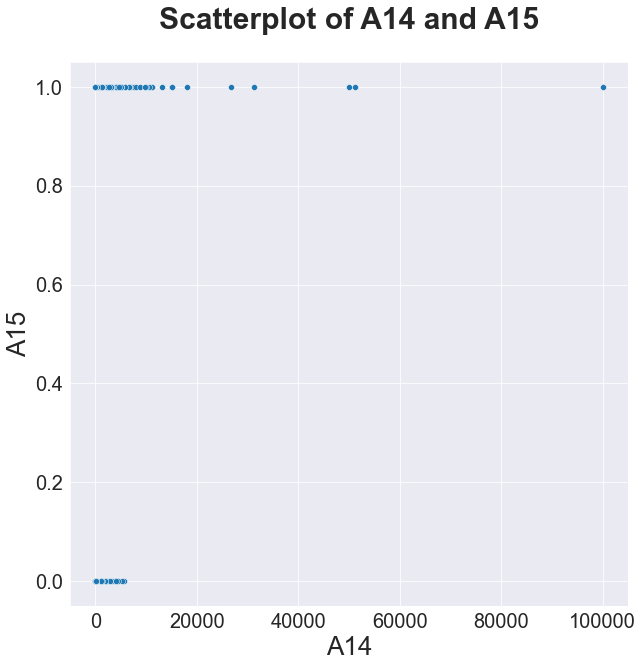

In [13]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_aus['A14'], y=data_aus['A15'])

plt.title('Scatterplot of A14 and A15', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A14', fontsize=26)
plt.ylabel('A15', fontsize=26)

plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [14]:
data_aus.kurtosis()

A1      -1.419112
A2       1.192059
A3       2.274022
A4      -0.338270
A5      -0.849043
A6      -0.178132
A7      11.200192
A8      -1.997138
A9      -1.919379
A10     50.829431
A11     -1.977151
A12      6.718888
A13     19.926698
A14    214.669972
A15     -1.956341
dtype: float64

In [15]:
data_aus.skew()

A1     -0.764859
A2      1.155935
A3      1.488813
A4     -1.153455
A5     -0.069190
A6      0.468412
A7      2.891330
A8     -0.093056
A9      0.293587
A10     5.152520
A11     0.169081
A12    -1.944725
A13     2.749912
A14    13.140655
A15     0.222122
dtype: float64

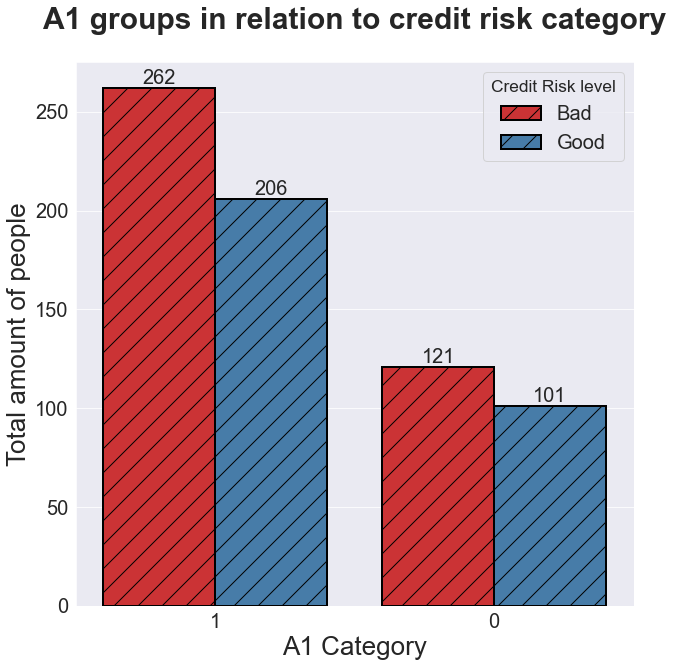

In [16]:
data_aus['A1'].unique()
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A1'], hue=data_aus['A15'], order=data_aus['A1'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A1 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A1 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

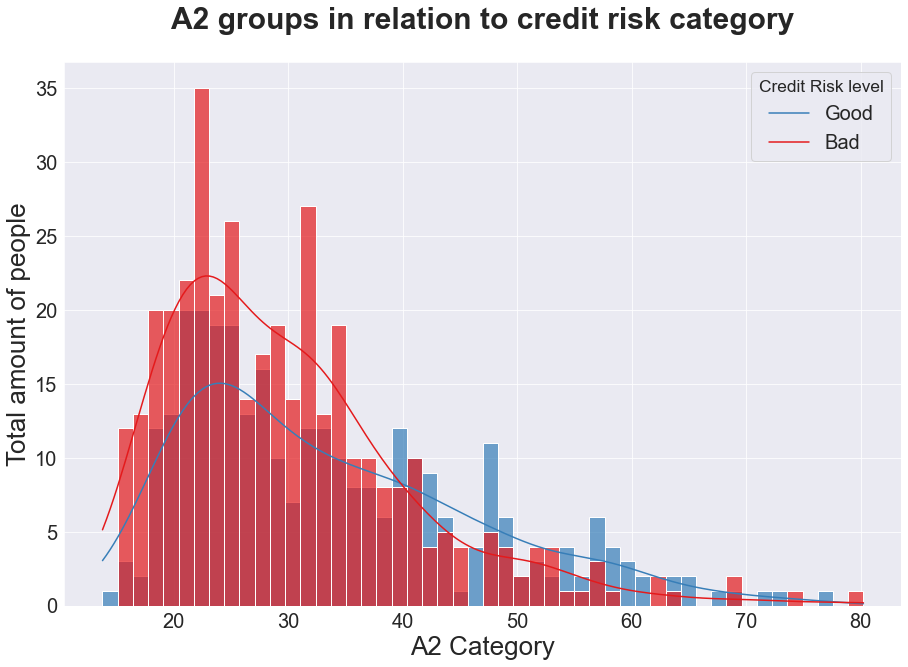

In [17]:
data_aus['A2'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data_aus['A2'], kde=True, alpha=0.7, hue=data_aus['A15'], palette='Set1', bins=50, fill=True)
plt.title('A2 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A2 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good','Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

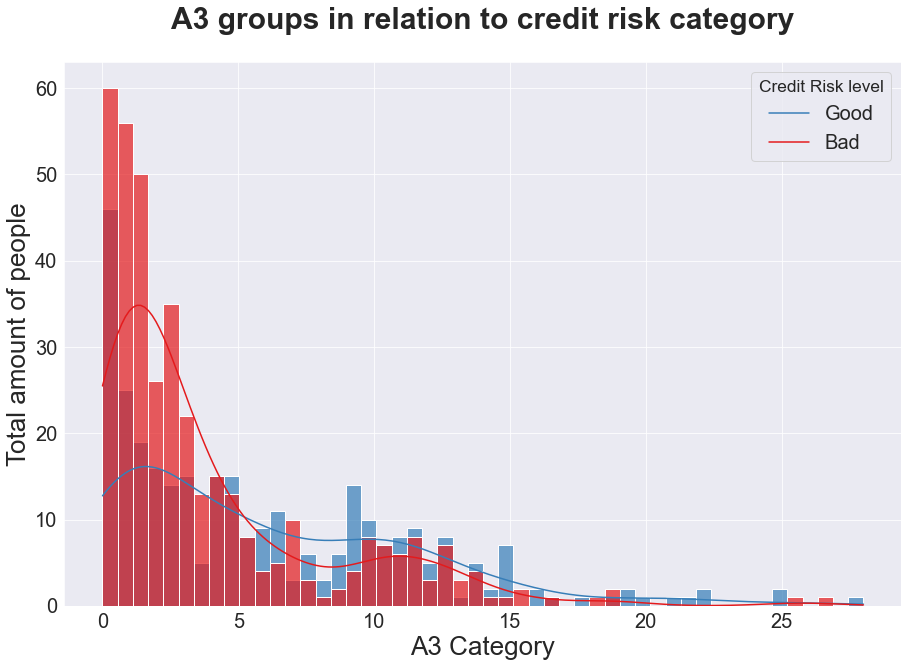

In [18]:
data_aus['A3'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data_aus['A3'], kde=True, alpha=0.7, hue=data_aus['A15'], palette='Set1', bins=50, fill=True)
plt.title('A3 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A3 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good', 'Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

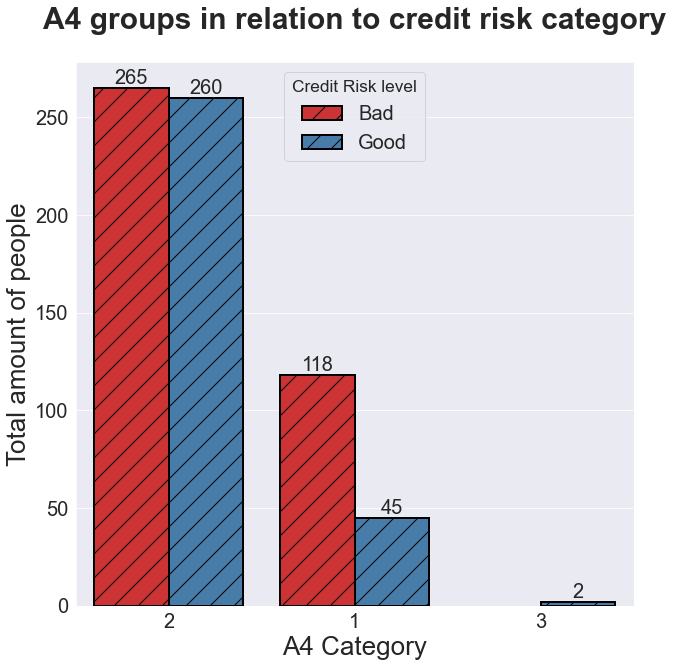

In [19]:
data_aus['A4'].unique()
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A4'], hue=data_aus['A15'], order=data_aus['A4'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A4 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A4 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

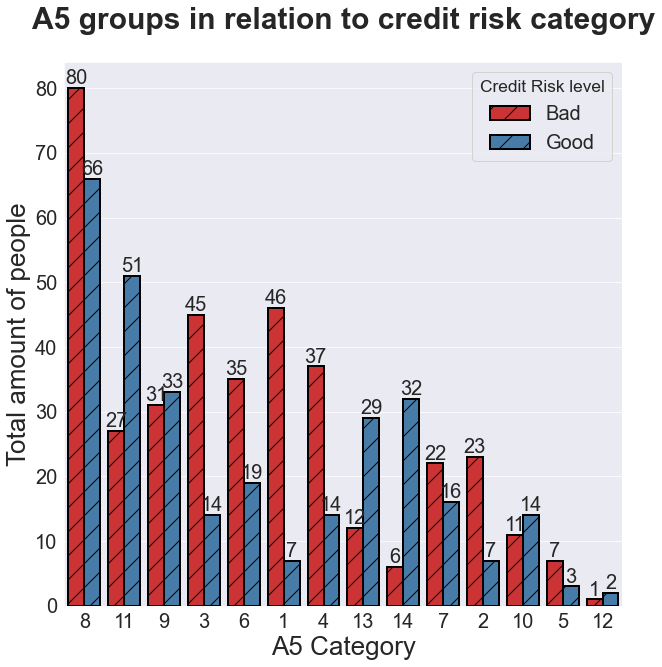

In [20]:
data_aus['A5'].unique()
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A5'], hue=data_aus['A15'], order=data_aus['A5'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A5 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A5 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

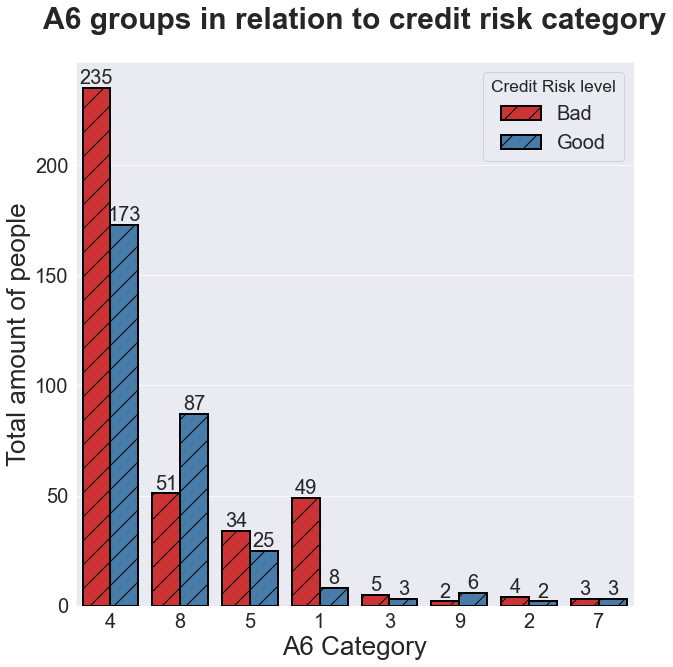

In [21]:
data_aus['A6'].unique()
plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A6'], hue=data_aus['A15'], order=data_aus['A6'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A6 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A6 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

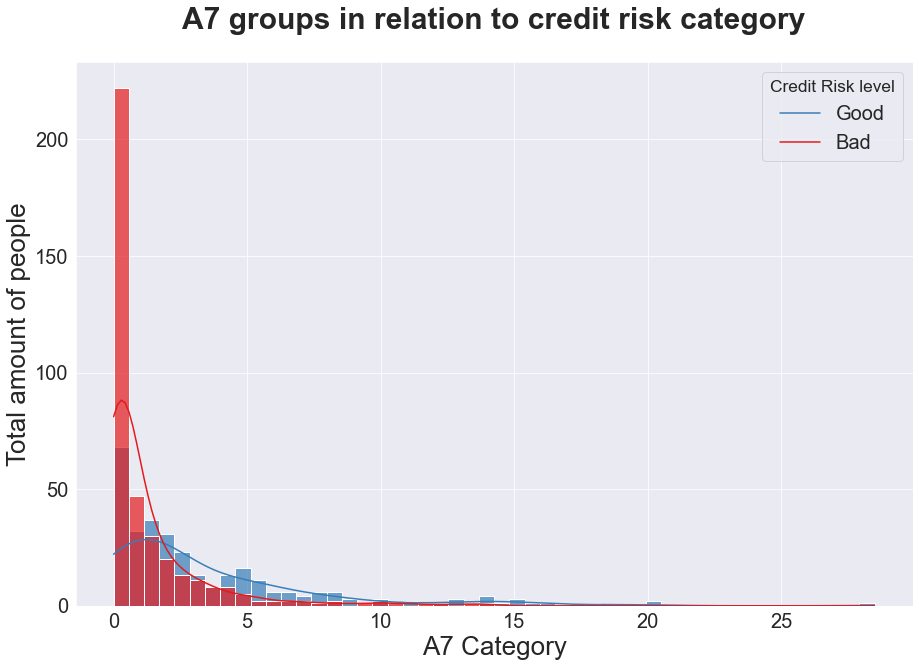

In [22]:
data_aus['A7'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data_aus['A7'], kde=True, alpha=0.7, hue=data_aus['A15'], palette='Set1', bins=50, fill=True)
plt.title('A7 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A7 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good', 'Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

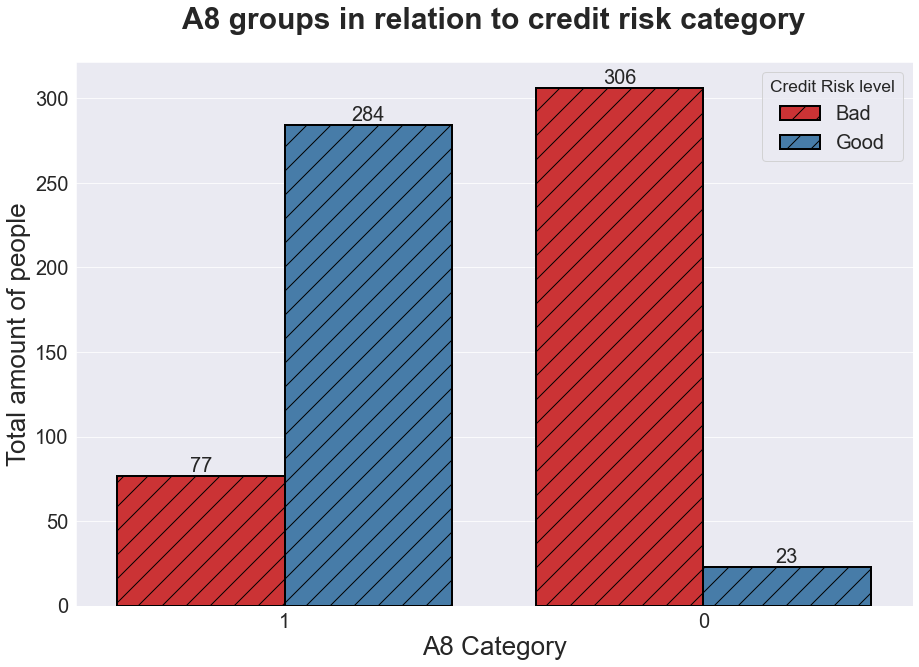

In [23]:
data_aus['A8'].unique()
plt.rcParams["figure.figsize"]=(15,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A8'], hue=data_aus['A15'], order=data_aus['A8'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A8 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A8 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

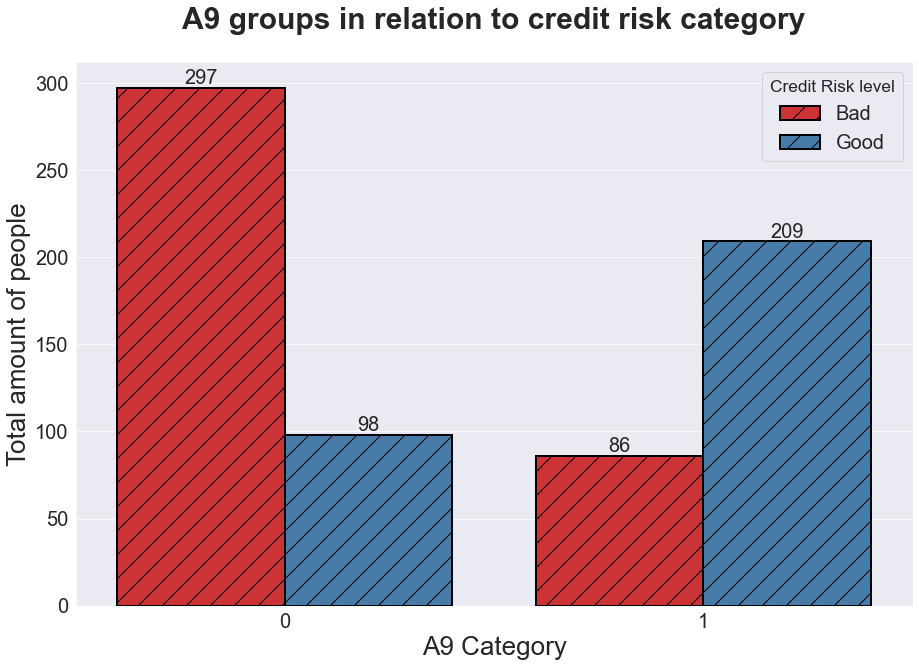

In [24]:
data_aus['A9'].unique()
plt.rcParams["figure.figsize"]=(15,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A9'], hue=data_aus['A15'], order=data_aus['A9'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A9 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A9 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

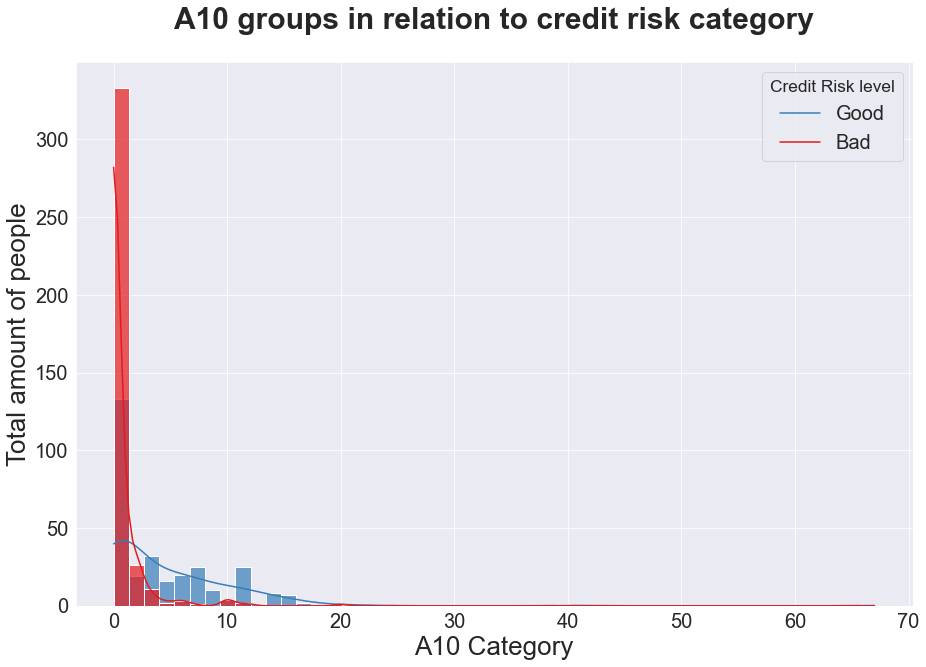

In [25]:
data_aus['A10'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data_aus['A10'], kde=True, alpha=0.7, hue=data_aus['A15'], palette='Set1', bins=50, fill=True)
plt.title('A10 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A10 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good', 'Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

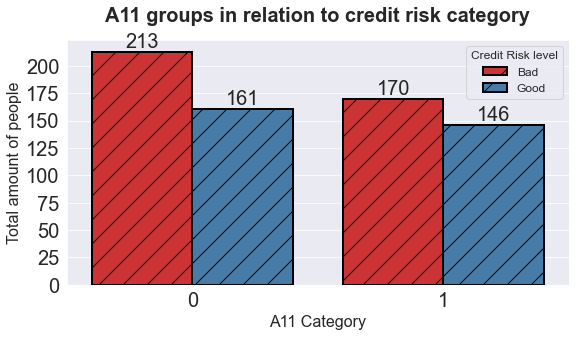

In [26]:
data_aus['A11'].unique()
plt.rcParams["figure.figsize"]=(9,4.5)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A11'], hue=data_aus['A15'], order=data_aus['A11'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A11 groups in relation to credit risk category', fontsize=20, y=1.05, weight='bold')
plt.xlabel('A11 Category', fontsize=16)
plt.ylabel('Total amount of people', fontsize=16)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 12}, title_fontsize='large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

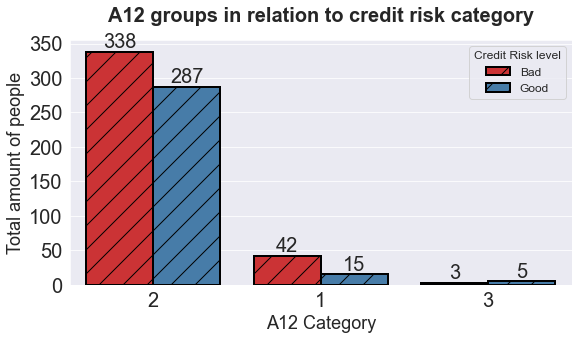

In [27]:
data_aus['A12'].unique()
plt.rcParams["figure.figsize"]=(9,4.5)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A12'], hue=data_aus['A15'], order=data_aus['A12'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('A12 groups in relation to credit risk category', fontsize=20, y=1.05, weight='bold')
plt.xlabel('A12 Category', fontsize=18)
plt.ylabel('Total amount of people', fontsize=18)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 12}, title_fontsize='large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

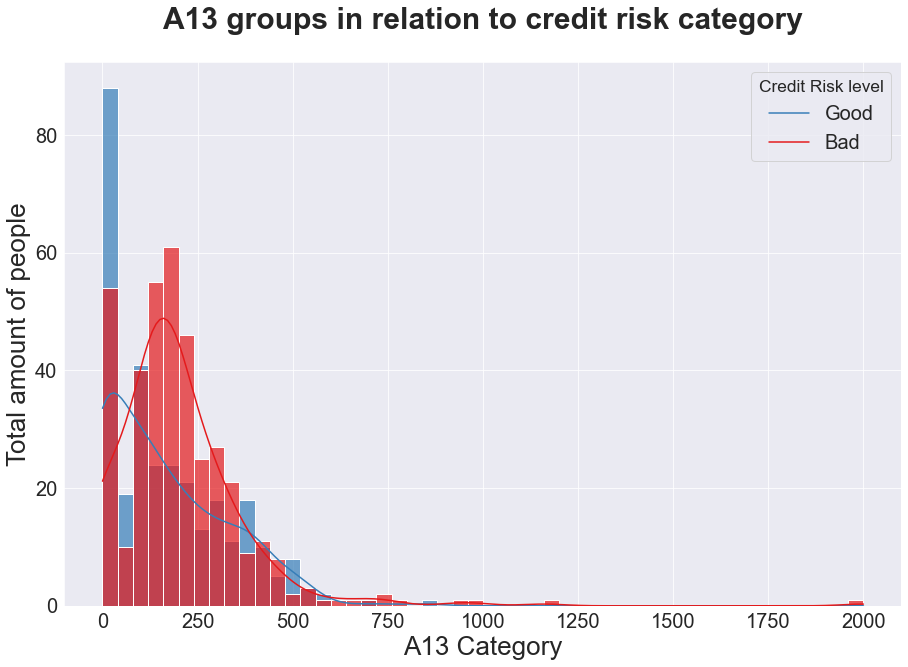

In [28]:
data_aus['A13'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data_aus['A13'], kde=True, alpha=0.7, hue=data_aus['A15'], palette='Set1', bins=50, fill=True)
plt.title('A13 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A13 Category', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good', 'Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

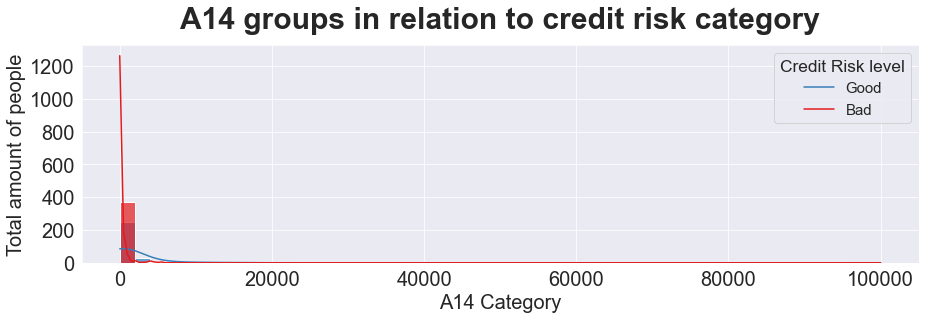

In [29]:
data_aus['A14'].unique()

plt.rcParams['figure.figsize']=(15,4)
sns.histplot(x=data_aus['A14'], kde=True, alpha=0.7, hue=data_aus['A15'], palette='Set1', bins=50, fill=True)
plt.title('A14 groups in relation to credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('A14 Category', fontsize=20)
plt.ylabel('Total amount of people', fontsize=20)
plt.legend(['Good', 'Bad'], title='Credit Risk level', prop={'size': 15}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

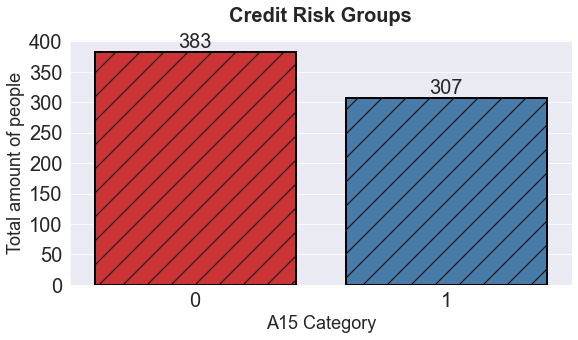

In [30]:
data_aus['A15'].unique()
plt.rcParams["figure.figsize"]=(9,4.5)
sns.set_style('darkgrid')
ax = sns.countplot(x=data_aus['A15'], order=data_aus['A15'].value_counts().iloc[:14].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit Risk Groups', fontsize=20, y=1.05, weight='bold')
plt.xlabel('A15 Category', fontsize=18)
plt.ylabel('Total amount of people', fontsize=18)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Text(0.5, 1.0, 'Boxplot of A2 variable')

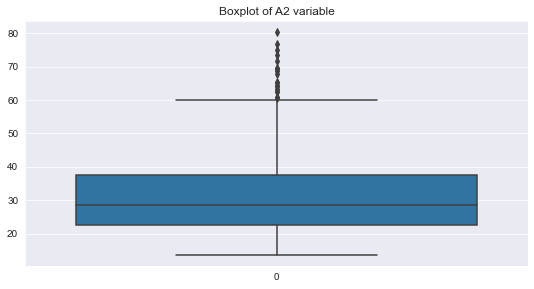

In [31]:
sns.boxplot(data=data_aus['A2'])
plt.title('Boxplot of A2 variable')

Text(0.5, 1.0, 'Boxplot of A3 variable')

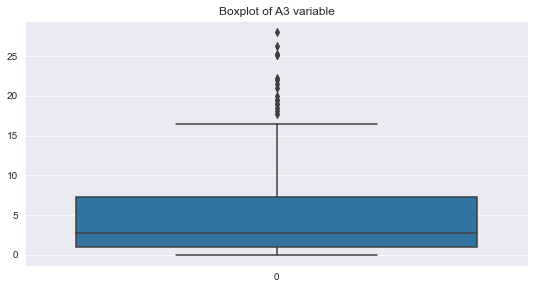

In [32]:
sns.boxplot(data=data_aus['A3'])
plt.title('Boxplot of A3 variable')

Text(0.5, 1.0, 'Boxplot of A7 variable')

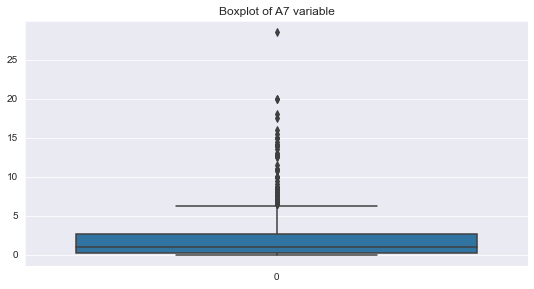

In [33]:
sns.boxplot(data=data_aus['A7'])
plt.title('Boxplot of A7 variable')

Text(0.5, 1.0, 'Boxplot of A10 variable')

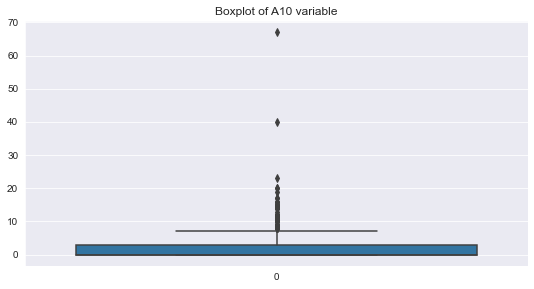

In [34]:
sns.boxplot(data=data_aus['A10'])
plt.title('Boxplot of A10 variable')

Text(0.5, 1.0, 'Boxplot of A13 variable')

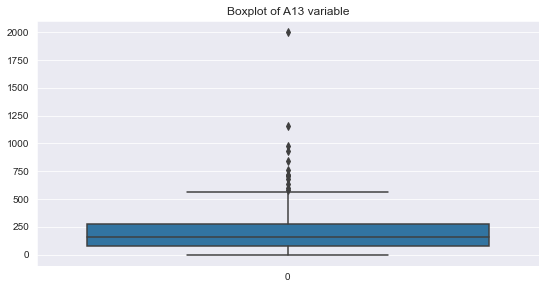

In [35]:
sns.boxplot(data=data_aus['A13'])
plt.title('Boxplot of A13 variable')

Text(0.5, 1.0, 'Boxplot of A14 variable')

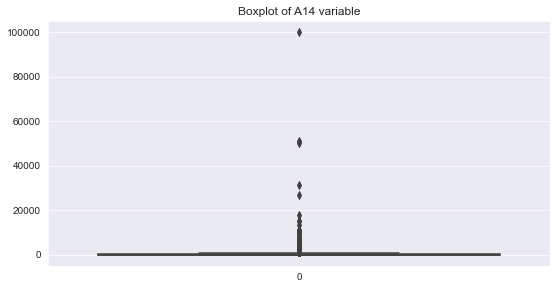

In [36]:
sns.boxplot(data=data_aus['A14'])
plt.title('Boxplot of A14 variable')

# Building the Model

In [37]:
X = data_aus.drop(['A15'], axis=1)
y = data_aus['A15']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [39]:
features=data_aus.columns.values.tolist()
y = ['A15']
X = [i for i in features if i not in y]

model_log = LogisticRegression(max_iter=10000)
model_rfe = RFE(model_log, step=3)

model_rfe.fit(X_train, y_train.values.ravel())
X_train.drop(X_train.columns[np.where(model_rfe.support_==False)[0]], axis=1, inplace=True)

In [40]:
X=X_train
y=y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

model_log = LogisticRegression(max_iter=10000)
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

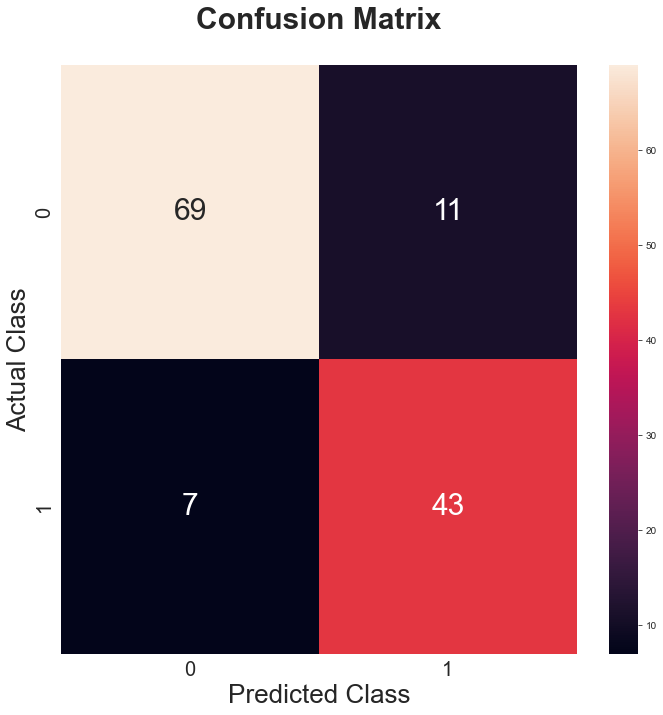

In [41]:
cnfs_mat = confusion_matrix(y_test,y_pred)

plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(cnfs_mat, annot=True, fmt="g", annot_kws={'size': 30})
plt.title('Confusion Matrix', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Predicted Class', fontsize=26)
plt.ylabel('Actual Class', fontsize=26)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        80
           1       0.80      0.86      0.83        50

    accuracy                           0.86       130
   macro avg       0.85      0.86      0.86       130
weighted avg       0.86      0.86      0.86       130



In [43]:
model_roc_auc = roc_auc_score(y_test, model_log.predict(X_test))
model_roc_auc

0.86125

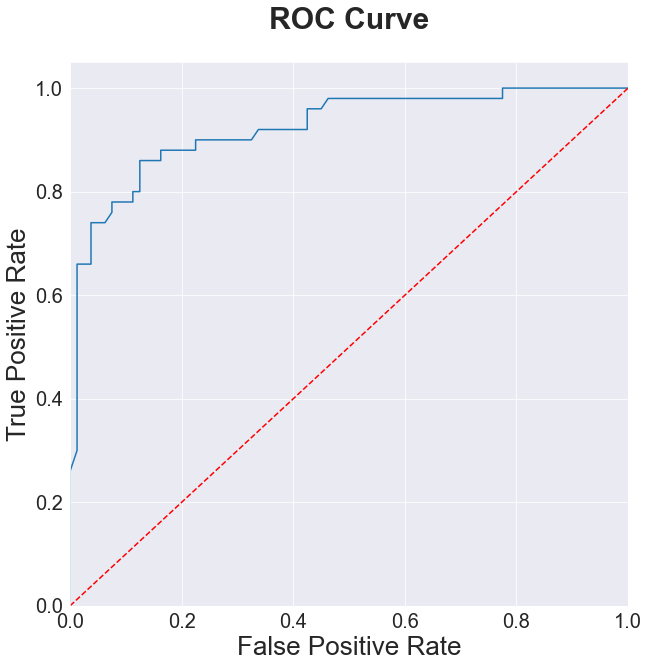

In [44]:
fp_rate, tp_rate, lim = roc_curve(y_test, model_log.predict_proba(X_test)[:,1])

plt.rcParams["figure.figsize"]=(10,10)
plt.plot(fp_rate,tp_rate, label='area = %0.2f'% model_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=26)
plt.ylabel('True Positive Rate', fontsize=26)
plt.title('ROC Curve', fontsize=30, y=1.05, weight='bold')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [45]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores_accuracy = cross_val_score(model_log, X, y, scoring = 'accuracy', cv=cross_val, n_jobs=-1)
scores_precision = cross_val_score(model_log, X, y, scoring = 'precision', cv=cross_val, n_jobs=-1)
scores_recall = cross_val_score(model_log, X, y, scoring = 'recall', cv=cross_val, n_jobs=-1)
scores_f1_score = cross_val_score(model_log, X, y, scoring = 'f1', cv=cross_val, n_jobs=-1)
print(f"Achieved mean accuracy of {np.mean(scores_accuracy):.4f} with std of {np.std(scores_accuracy):.4f}.")
print(f"Achieved mean precision of {np.mean(scores_precision):.4f} with std of {np.std(scores_precision):.4f}.")
print(f"Achieved mean recall of {np.mean(scores_recall):.4f} with std of {np.std(scores_recall):.4f}.")
print(f"Achieved mean f1-score of {np.mean(scores_f1_score):.4f} with std of {np.std(scores_f1_score):.4f}.")

Achieved mean accuracy of 0.8642 with std of 0.0460.
Achieved mean precision of 0.8271 with std of 0.0790.
Achieved mean recall of 0.8849 with std of 0.0672.
Achieved mean f1-score of 0.8520 with std of 0.0552.
